In [37]:
import pandas as pd

df = pd.read_csv('Data.csv')

df


,Date,Close/Last,Volume,Open,High,Low
0,08/29/2025,$506.69,20961570,$508.66,$509.60,$504.4915
1,08/28/2025,$509.64,18015590,$507.09,$511.09,$505.50
2,08/27/2025,$506.74,17277890,$502.00,$507.29,$499.90
3,08/26/2025,$502.04,30835710,$504.355,$504.9778,$498.51
4,08/25/2025,$504.26,21638580,$506.63,$508.19,$504.12
...,...,...,...,...,...,...
2510,09/04/2015,$42.61,37019110,$42.81,$43.04,$42.195
2511,09/03/2015,$43.50,28206410,$43.41,$43.98,$43.28
2512,09/02/2015,$43.36,37624230,$42.36,$43.38,$41.88
2513,09/01/2015,$41.82,49682210,$42.17,$42.59,$41.66


In [38]:
df = df[['Date','Close/Last']]

df

,Date,Close/Last
0,08/29/2025,$506.69
1,08/28/2025,$509.64
2,08/27/2025,$506.74
3,08/26/2025,$502.04
4,08/25/2025,$504.26
...,...,...
2510,09/04/2015,$42.61
2511,09/03/2015,$43.50
2512,09/02/2015,$43.36
2513,09/01/2015,$41.82


In [39]:
df['Date']

,Date
0,08/29/2025
1,08/28/2025
2,08/27/2025
3,08/26/2025
4,08/25/2025
...,...
2510,09/04/2015
2511,09/03/2015
2512,09/02/2015
2513,09/01/2015


In [40]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [41]:
df

,Date,Close/Last
0,08/29/2025,$506.69
1,08/28/2025,$509.64
2,08/27/2025,$506.74
3,08/26/2025,$502.04
4,08/25/2025,$504.26
...,...,...
2510,09/04/2015,$42.61
2511,09/03/2015,$43.50
2512,09/02/2015,$43.36
2513,09/01/2015,$41.82


In [42]:
df['Date'] = pd.to_datetime(df['Date'])


/tmp/ipython-input-3386729631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [43]:
df.index = df.pop('Date')
df

,Close/Last
Date,
2025-08-29,$506.69
2025-08-28,$509.64
2025-08-27,$506.74
2025-08-26,$502.04
2025-08-25,$504.26
...,...
2015-09-04,$42.61
2015-09-03,$43.50
2015-09-02,$43.36


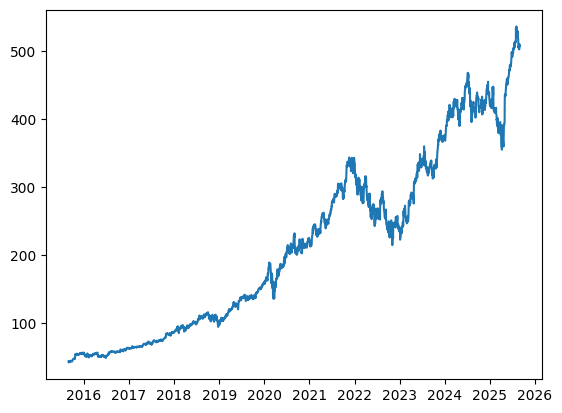

In [52]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close/Last'])

In [53]:
import pandas as pd
import numpy as np

# --- Clean Data ---
df['Close/Last'] = df['Close/Last'].replace({'\$':''}, regex=True).astype(float)
df.index = pd.to_datetime(df.index)
df = df.sort_index()   # ascending order (2015 → 2025)

# --- Windowing Function ---
def df_to_windowed_df(dataframe, start_date, end_date, n=3):
    dataframe = dataframe.loc[start_date:end_date]

    X, Y, dates = [], [], []
    values = dataframe['Close/Last'].values
    dates_all = dataframe.index

    for i in range(len(values) - n):
        x = values[i:i+n]
        y = values[i+n]
        X.append(x)
        Y.append(y)
        dates.append(dates_all[i+n])

    # Build new DataFrame
    ret_df = pd.DataFrame({'Target Date': dates, 'Target': Y})
    for j in range(n):
        ret_df[f'Target-{n-j}'] = np.array(X)[:, j]

    # Reorder columns: Target Date, Target-3, Target-2, Target-1, Target
    cols = ['Target Date'] + [f'Target-{k}' for k in range(n,0,-1)] + ['Target']
    ret_df = ret_df[cols]

    return ret_df

# --- Example Call ---
windowed_df = df_to_windowed_df(df, '2021-03-25', '2022-03-23', n=3)
print(windowed_df)


    Target Date  Target-3  Target-2  Target-1  Target
0    2021-03-30    232.34    236.48    235.24  231.85
1    2021-03-31    236.48    235.24    231.85  235.77
2    2021-04-01    235.24    231.85    235.77  242.35
3    2021-04-05    231.85    235.77    242.35  249.07
4    2021-04-06    235.77    242.35    249.07  247.86
..          ...       ...       ...       ...     ...
244  2022-03-17    276.44    287.15    294.39  295.22
245  2022-03-18    287.15    294.39    295.22  300.43
246  2022-03-21    294.39    295.22    300.43  299.16
247  2022-03-22    295.22    300.43    299.16  304.06
248  2022-03-23    300.43    299.16    304.06  299.49

[249 rows x 5 columns]


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1000588755.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Close/Last'] = df['Close/Last'].replace({'\$':''}, regex=True).astype(float)
/tmp/ipython-input-1000588755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close/Last'] = df['Close/Last'].replace({'\$':''}, regex=True).astype(float)


In [54]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((249,), (249, 3, 1), (249,))

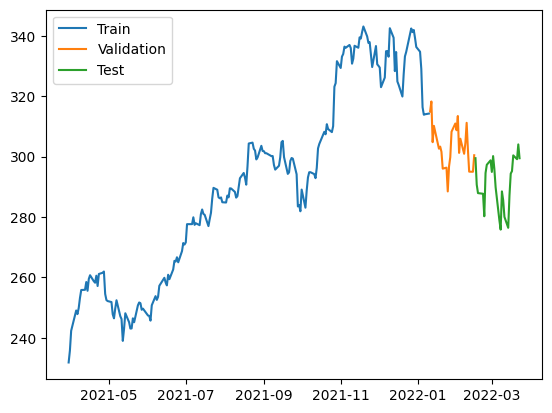

In [55]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

LSTM and CNN



In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([
    layers.Input((3, 1)),
    layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
    layers.MaxPooling1D(pool_size=1),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 86418.3984 - mean_absolute_error: 292.1593 - val_loss: 91931.7891 - val_mean_absolute_error: 303.1214
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84013.9531 - mean_absolute_error: 288.1724 - val_loss: 91565.6094 - val_mean_absolute_error: 302.5168
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 84727.3750 - mean_absolute_error: 289.4797 - val_loss: 91097.0391 - val_mean_absolute_error: 301.7414
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 82472.2734 - mean_absolute_error: 285.4703 - val_loss: 90399.5391 - val_mean_absolute_error: 300.5833
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 83564.7188 - mean_absolute_error: 287.3758 - val_loss: 89390.0312 - val_mean_absolute_error: 298.8994
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 82904.1719 - mean_absolute_error: 286.2180 - val_loss: 88299.7266 - val_mean_absolute_error: 297.0699
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


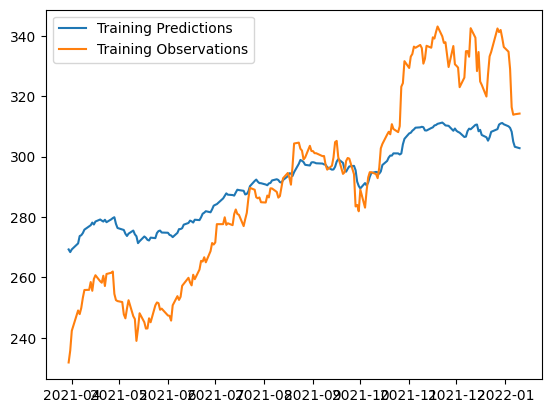

In [57]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


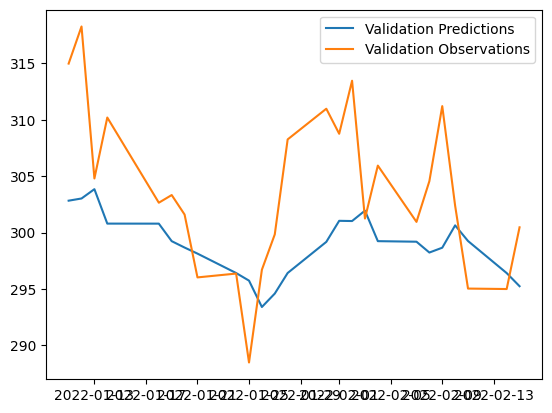

In [58]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


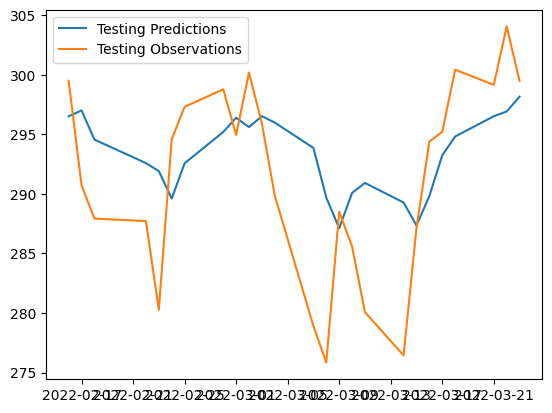

In [59]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

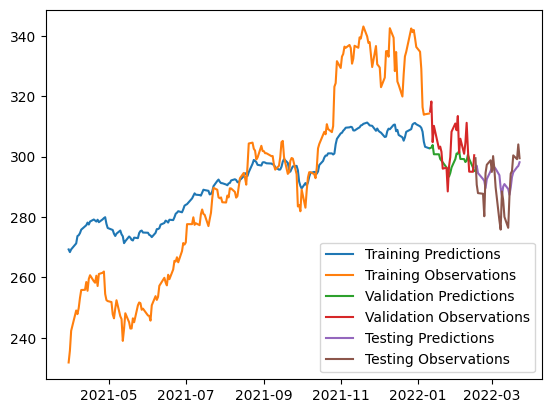

In [61]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [62]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

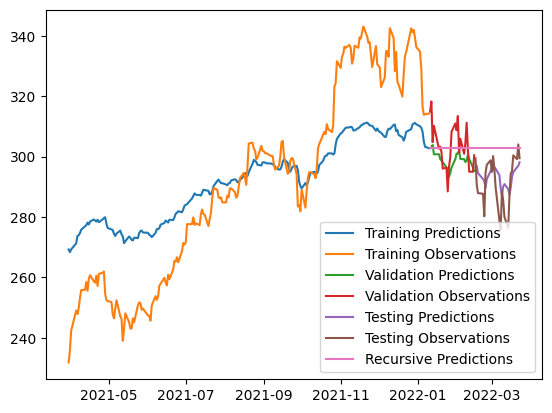

In [63]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])